In [89]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns
from textblob import TextBlob
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "NGRhsDF0LQwA60z7eBigJvfLY"
consumer_secret = "4JBpQEHIbsCmIZhPlTb94q7cUCMTvYeNhUCH0cjqgu3Ney1Gvk"
access_token = "975059013292339200-jCjFWdC5YSgkhaRnpbQebYrdNxQWLIW"
access_token_secret = "QeWaEBYppYrFMOI82As3kV7RAYSKQ5EJGX87voED49ynD"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [90]:
#Target users
target_users = ["@BBC","@CBS", "@CNN", "@FOXTV", "@nytimes"]

# Variables for holding sentiments
sentiments = []

#Loop through all target users:
for target_user in target_users:
    # Counter
    counter = 1

        # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(target_user)
        # Loop through all tweets 
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter

            # Add sentiments for each tweet into an array
            sentiments.append({"Tweet":tweet["text"],
                               "Date": tweet["created_at"], 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter,
                              "Media Source":tweet["user"]["name"]})

            # Add to counter 
            counter = counter + 1

In [91]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Date,Media Source,Negative,Neutral,Positive,Tweet,Tweets Ago
0,0.784,Thu Mar 29 08:00:12 +0000 2018,BBC,0.655,0.0,0.345,🐶❤️ Biscuit the robotic pup is helping the eld...,1
1,0.000,Thu Mar 29 07:27:07 +0000 2018,BBC,1.000,0.0,0.000,👀🌸 The world famous cherry blossoms of Japan b...,2
2,0.000,Thu Mar 29 07:00:10 +0000 2018,BBC,1.000,0.0,0.000,What do you get if you cross a polar bear and ...,3
3,0.000,Wed Mar 28 18:00:05 +0000 2018,BBC,1.000,0.0,0.000,🇮🇪 This 800-year-old hotel in Ireland is simpl...,4
4,0.296,Wed Mar 28 17:00:12 +0000 2018,BBC,0.891,0.0,0.109,📚 'Words do not live in dictionaries. They liv...,5


In [92]:
#Export Twitter Data to CSV File
sentiments_pd.to_csv('twitter_news.csv', encoding='utf-8', index=False)

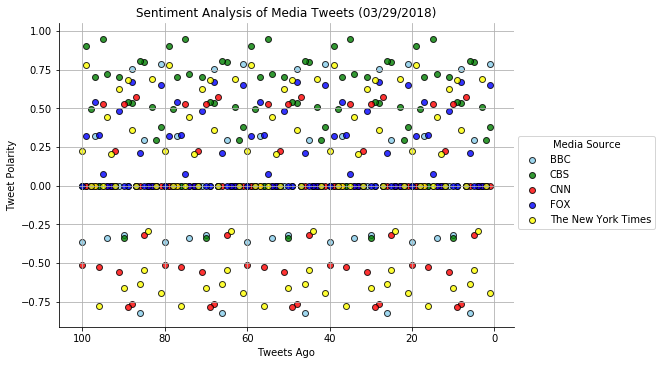

In [93]:
#Create Scatter plot for sentiment analysis of 100 tweets for all media sources
sn_plot = sns.lmplot(x="Tweets Ago", y="Compound", hue = 'Media Source', data=sentiments_pd, fit_reg=False,
           legend=True, legend_out=True, aspect=1.5, scatter_kws = {'alpha':0.8, 'linewidths':1, 'edgecolor':'black', 'marker':'o'}, 
                     palette={"BBC":"skyblue", "CBS":"green", "CNN":"red", "FOX":"blue", "The New York Times":"yellow"})
plt.gca().invert_xaxis()
# Incorporate the other graph properties
plt.title("Sentiment Analysis of Media Tweets (03/29/2018)")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid(True)
plt.savefig('Sentiment_Analysis.png')
plt.show()

In [94]:
#Create dataframe for overall sentiment
overall_sentiments = sentiments_pd.groupby(['Media Source']).mean()['Compound']
overall_sentiments_df = pd.DataFrame({"Overall Sentiment Score": overall_sentiments})
overall_sentiments_df.head()


,Overall Sentiment Score
Media Source,
BBC,0.015345
CBS,0.398875
CNN,-0.080540
FOX,0.163785
The New York Times,0.019965


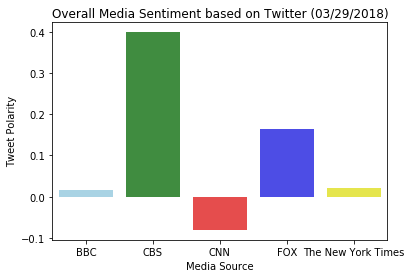

In [95]:
#Create a Bar Plot for overall Sentiment analysis
sn_plot = sns.barplot(x=overall_sentiments_df.index, y=overall_sentiments_df['Overall Sentiment Score'], 
                      data=overall_sentiments_df, palette={"BBC":"skyblue", "CBS":"green", "CNN":"red", "FOX":"blue", "The New York Times":"yellow"}, 
                      alpha=0.8, linewidth=1)

# Incorporate the other graph properties
plt.title("Overall Media Sentiment based on Twitter (03/29/2018)")
plt.ylabel("Tweet Polarity")

plt.savefig('Overall_Sentiment_Analysis.png')
plt.show()

